Working Directory 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [405]:
%cd /content/drive/MyDrive/Colab Notebooks/Lecture-Clustering/datasets
import os
os.getcwd()

/content/drive/MyDrive/Colab Notebooks/Lecture-Clustering/datasets


'/content/drive/MyDrive/Colab Notebooks/Lecture-Clustering/datasets'

Dataset들을 불러온 후 하나로 합치는 작업

In [406]:
path = os.getcwd() + '/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

In [407]:
import pandas as pd

df = pd.DataFrame()
for i in file_list_py:
  data = pd.read_csv(path + i)
  df = pd.concat([df, data])

df = df.reset_index(drop = True)

csv 파일을 만드는 과정에서 helpful column과 comment column이 의도한 것과 반대로 저장되어 바꾸어 주는 작업을 진행

column에 대한 설명

1. index
2. year: 연도-학기
3. type: 학수번호
4. subject: 과목명
5. day: 요일, 교시
6. satisfy: 강의 만족도
7. writer: 강의평 작성자
8. ratings0: 학습량
9. ratings1: 난이도
10. ratings2: 학점
11. ratings3: 성취감
12. comment: 강의평
13. helpful: 강의평이 받은 추천의 개수

In [408]:
df.columns = ["index", "year", "type", "subject", "professor", "day", "satisfy", "writer", "ratings0", "ratings1", "ratings2", "ratings3", "comment", "helpful"]
df.head(5)

,index,year,type,subject,professor,day,satisfy,writer,ratings0,ratings1,ratings2,ratings3,comment,helpful
0,0,14-2,COSE242,데이터통신,김효곤,#화(2) 목(2),3,배가고픔니다,3,3,3,3,교수님도 좋으시고 강의도 좋습니다. 비록 전 듣지 않았지만 아마도 좋은 것 같습니다...,도움이 돼요 2
1,1,14-2,COSE242,데이터통신,김효곤,#화(2) 목(2),3,수능5등급,4,4,3,3,이번에 대형강의라 약간 널널하게 했다 하나 그런것 같습니다.\n교수님이 설명은 잘하...,도움이 돼요 2
2,2,14-2,COSE242,데이터통신,김효곤,#화(2) 목(2),1,skcjswo,5,5,2,1,출첵을 안해서 막판엔 사람들이 수업을 잘안나옴\n\n시험범위가 8장씩 되고\n\n수...,도움이 돼요 2
3,3,14-2,COSE242,데이터통신,김효곤,#화(2) 목(2),4,붉은눈의뻐꾸기,3,4,4,4,제가 생각하는 정통대 참교수님중에 한 분이십니다. 일단 강의력은 전혀 부족함이 없으...,도움이 돼요 0
4,4,14-2,COSE242,데이터통신,김효곤,#화(2) 목(2),4,ysd10291,4,4,3,4,내용 자체가 쉬운 편은 아니에요. 다만 교수님이 설명을 잘해주심. 또 한가지 더! ...,도움이 돼요 0


유의미하지 않은 column을 없애는 과정

1. index
2. year
3. writer
4. comment - 2020년부터의 강의평에서는 comment column에 학점에 대한 평가가 명시되어 있으나 현재 다루고 있는 데이터프레임인 2019년까지의 강의평에서는 그렇지 않음. 추후 wordcloud를 그리는 과정에 사용될 feature이기 때문에 제외

In [409]:
df = df.drop(columns = ['index', 'year', 'writer', 'comment'])
df.head(5)

,type,subject,professor,day,satisfy,ratings0,ratings1,ratings2,ratings3,helpful
0,COSE242,데이터통신,김효곤,#화(2) 목(2),3,3,3,3,3,도움이 돼요 2
1,COSE242,데이터통신,김효곤,#화(2) 목(2),3,4,4,3,3,도움이 돼요 2
2,COSE242,데이터통신,김효곤,#화(2) 목(2),1,5,5,2,1,도움이 돼요 2
3,COSE242,데이터통신,김효곤,#화(2) 목(2),4,3,4,4,4,도움이 돼요 0
4,COSE242,데이터통신,김효곤,#화(2) 목(2),4,4,4,3,4,도움이 돼요 0


중복되는 의미를 가지는 column을 제거하는 과정

1. type
2. subject

subject를 제외하기로 결정

In [410]:
df = df.drop(columns = ['subject'])
df.head(5)

,type,professor,day,satisfy,ratings0,ratings1,ratings2,ratings3,helpful
0,COSE242,김효곤,#화(2) 목(2),3,3,3,3,3,도움이 돼요 2
1,COSE242,김효곤,#화(2) 목(2),3,4,4,3,3,도움이 돼요 2
2,COSE242,김효곤,#화(2) 목(2),1,5,5,2,1,도움이 돼요 2
3,COSE242,김효곤,#화(2) 목(2),4,3,4,4,4,도움이 돼요 0
4,COSE242,김효곤,#화(2) 목(2),4,4,4,3,4,도움이 돼요 0


+)
강의평에 따라 강의 유형을 구분하는건데, 전공 과목 자체가 강의 유형을 구분하는데는 부족하다는 판단 -> 학수번호도 드랍

In [411]:
df = df.drop(columns = ['type'])
df.head(5)

,professor,day,satisfy,ratings0,ratings1,ratings2,ratings3,helpful
0,김효곤,#화(2) 목(2),3,3,3,3,3,도움이 돼요 2
1,김효곤,#화(2) 목(2),3,4,4,3,3,도움이 돼요 2
2,김효곤,#화(2) 목(2),1,5,5,2,1,도움이 돼요 2
3,김효곤,#화(2) 목(2),4,3,4,4,4,도움이 돼요 0
4,김효곤,#화(2) 목(2),4,4,4,3,4,도움이 돼요 0


아 몰라 교수 드랍

In [412]:
df = df.drop(columns = ['professor'])
df.head(5)

,day,satisfy,ratings0,ratings1,ratings2,ratings3,helpful
0,#화(2) 목(2),3,3,3,3,3,도움이 돼요 2
1,#화(2) 목(2),3,4,4,3,3,도움이 돼요 2
2,#화(2) 목(2),1,5,5,2,1,도움이 돼요 2
3,#화(2) 목(2),4,3,4,4,4,도움이 돼요 0
4,#화(2) 목(2),4,4,4,3,4,도움이 돼요 0


In [413]:
df = df.drop(columns = ['helpful'])
df.head(5)

,day,satisfy,ratings0,ratings1,ratings2,ratings3
0,#화(2) 목(2),3,3,3,3,3
1,#화(2) 목(2),3,4,4,3,3
2,#화(2) 목(2),1,5,5,2,1
3,#화(2) 목(2),4,3,4,4,4
4,#화(2) 목(2),4,4,4,3,4


type, professor, day, helpful column을 encoding하는 과정

helpful은 추천의 개수를 int 자료형으로 따로 추출하여 저장

day는 수업 교시를 int 자료형으로 따로 추출하여 저장하고, 요일은 one-hot encoding 진행

type, professor는 one-hot encoding 진행

In [415]:
# 날짜 및 교시 추출
# 교시는 모든 수업 날짜 중 가장 빠른 교시를 기준으로 추출함
import re

mon = []
tue = []
wed = []
thu = []
fri = []
period = []
for d in df['day']:
  period.append(min(map(int, re.findall(r'\d', d))))
  mon.append(1 if '월' in d else 0)
  tue.append(1 if '화' in d else 0)
  wed.append(1 if '수' in d else 0)
  thu.append(1 if '목' in d else 0)
  fri.append(1 if '금' in d else 0)

df['mon'] = mon
df['tue'] = tue
df['wed'] = wed
df['thu'] = thu
df['fri'] = fri
df['period'] = period
df = df.drop(columns = ['day'])

In [416]:
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period
0,3,3,3,3,3,0,1,0,1,0,2
1,3,4,4,3,3,0,1,0,1,0,2
2,1,5,5,2,1,0,1,0,1,0,2
3,4,3,4,4,4,0,1,0,1,0,2
4,4,4,4,3,4,0,1,0,1,0,2


### 분석 과정

K 찾기

K: 1	Inertia: 6556.706999130299	
K: 2	Inertia: 2942.9607246928663	Difference: 3613.7462744374325
K: 3	Inertia: 2544.793062359396	Difference: 398.16766233347016
K: 4	Inertia: 2361.6805659744987	Difference: 183.11249638489744
K: 5	Inertia: 2136.215945084027	Difference: 225.46462089047145
K: 6	Inertia: 1970.6654011302007	Difference: 165.5505439538265
K: 7	Inertia: 1770.086572245367	Difference: 200.57882888483368
K: 8	Inertia: 1638.45967931295	Difference: 131.62689293241715
K: 9	Inertia: 1542.7437965929485	Difference: 95.71588272000145
K: 10	Inertia: 1474.4276962499398	Difference: 68.31610034300866
K: 11	Inertia: 1397.1667918155736	Difference: 77.26090443436624
K: 12	Inertia: 1310.486729343309	Difference: 86.68006247226458
K: 13	Inertia: 1258.505812474927	Difference: 51.98091686838188
K: 14	Inertia: 1208.5191187797227	Difference: 49.986693695204394
K: 15	Inertia: 1155.8431260935117	Difference: 52.675992686210975
K: 16	Inertia: 1107.709070057331	Difference: 48.13405603618071
K: 17	Inertia: 

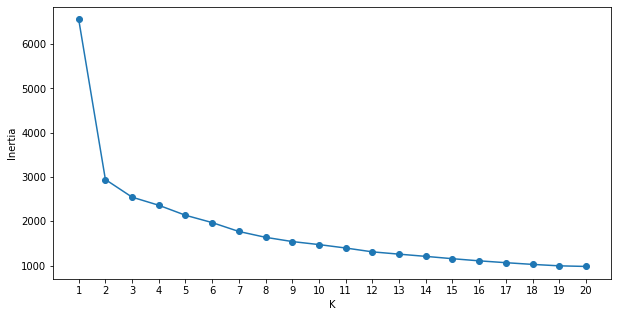

In [420]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

inertia = []
for i in range(1, 21):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 1:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(1, 21), inertia, marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(1, 21))
plt.show()

In [332]:
# fitting을 다시 하기 전에 실행
df = df.drop(columns = ['cluster', 'x', 'y'])
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,helpful,mon,tue,wed,thu,fri,period,z
0,3,3,3,3,3,2,0,1,0,1,0,2,3.666093
1,3,4,4,3,3,2,0,1,0,1,0,2,6.332150
2,1,5,5,2,1,2,0,1,0,1,0,2,24.521172
3,4,3,4,4,4,0,0,1,0,1,0,2,-4.454183
4,4,4,4,3,4,0,0,1,0,1,0,2,-0.507370


In [421]:
# 클러스터 수 = 7
model = KMeans(n_clusters = 7, random_state = 0)
model.fit(X)

df['cluster'] = model.fit_predict(X)
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period,cluster
0,3,3,3,3,3,0,1,0,1,0,2,0
1,3,4,4,3,3,0,1,0,1,0,2,0
2,1,5,5,2,1,0,1,0,1,0,2,0
3,4,3,4,4,4,0,1,0,1,0,2,0
4,4,4,4,3,4,0,1,0,1,0,2,0


In [399]:
# output 코드 실행했으면 다음 코드 실행
df = df.drop(columns = ['x', 'y', 'z'])
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period,cluster
0,3,3,3,3,3,0,1,0,1,0,2,0
1,3,4,4,3,3,0,1,0,1,0,2,0
2,1,5,5,2,1,0,1,0,1,0,2,0
3,4,3,4,4,4,0,1,0,1,0,2,0
4,4,4,4,3,4,0,1,0,1,0,2,0


### 시각화

In [422]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df)

df['x'] = pca_transformed[:, 0]
df['y'] = pca_transformed[:, 1]

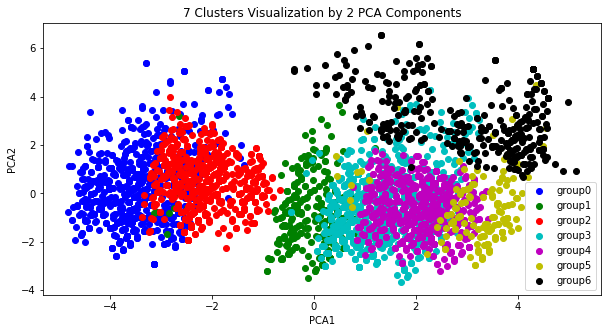

In [423]:
group0 = df[df['cluster'] == 0].index
group1 = df[df['cluster'] == 1].index
group2 = df[df['cluster'] == 2].index
group3 = df[df['cluster'] == 3].index
group4 = df[df['cluster'] == 4].index
group5 = df[df['cluster'] == 5].index
group6 = df[df['cluster'] == 6].index

plt.scatter(x = df.loc[group0, 'x'], y = df.loc[group0, 'y'], color = 'b')
plt.scatter(x = df.loc[group1, 'x'], y = df.loc[group1, 'y'], color = 'g')
plt.scatter(x = df.loc[group2, 'x'], y = df.loc[group2, 'y'], color = 'r')
plt.scatter(x = df.loc[group3, 'x'], y = df.loc[group3, 'y'], color = 'c')
plt.scatter(x = df.loc[group4, 'x'], y = df.loc[group4, 'y'], color = 'm')
plt.scatter(x = df.loc[group5, 'x'], y = df.loc[group5, 'y'], color = 'y')
plt.scatter(x = df.loc[group6, 'x'], y = df.loc[group6, 'y'], color = 'k')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('7 Clusters Visualization by 2 PCA Components')
plt.legend(['group0', 'group1', 'group2', 'group3', 'group4', 'group5', 'group6'])
plt.show()

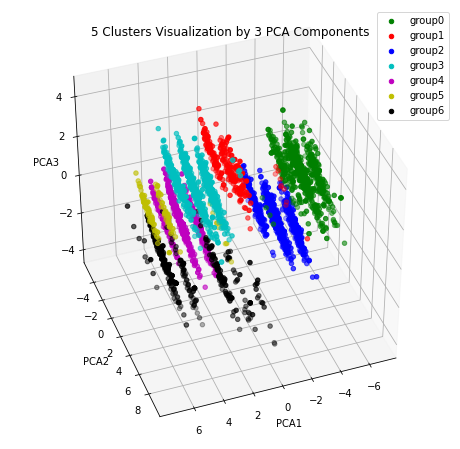

In [424]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components = 3)
pca3_transformed = pca3.fit_transform(df)

df['x'] = pca3_transformed[:, 0]
df['y'] = pca3_transformed[:, 1]
df['z'] = pca3_transformed[:, 2]

group0 = df[df['cluster'] == 0].index
group1 = df[df['cluster'] == 1].index
group2 = df[df['cluster'] == 2].index
group3 = df[df['cluster'] == 3].index
group4 = df[df['cluster'] == 4].index
group5 = df[df['cluster'] == 5].index
group6 = df[df['cluster'] == 6].index

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(xs = df.loc[group0, 'x'], ys = df.loc[group0, 'y'], zs = df.loc[group0, 'z'], color = 'g')
ax1.scatter(xs = df.loc[group1, 'x'], ys = df.loc[group1, 'y'], zs = df.loc[group1, 'z'], color = 'r')
ax1.scatter(xs = df.loc[group2, 'x'], ys = df.loc[group2, 'y'], zs = df.loc[group2, 'z'], color = 'b')
ax1.scatter(xs = df.loc[group3, 'x'], ys = df.loc[group3, 'y'], zs = df.loc[group3, 'z'], color = 'c')
ax1.scatter(xs = df.loc[group4, 'x'], ys = df.loc[group4, 'y'], zs = df.loc[group4, 'z'], color = 'm')
ax1.scatter(xs = df.loc[group5, 'x'], ys = df.loc[group5, 'y'], zs = df.loc[group5, 'z'], color = 'y')
ax1.scatter(xs = df.loc[group6, 'x'], ys = df.loc[group6, 'y'], zs = df.loc[group6, 'z'], color = 'k')

ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')
ax1.view_init(40,70)

plt.title('5 Clusters Visualization by 3 PCA Components')
plt.legend(['group0', 'group1', 'group2', 'group3', 'group4', 'group5', 'group6'])
plt.show()

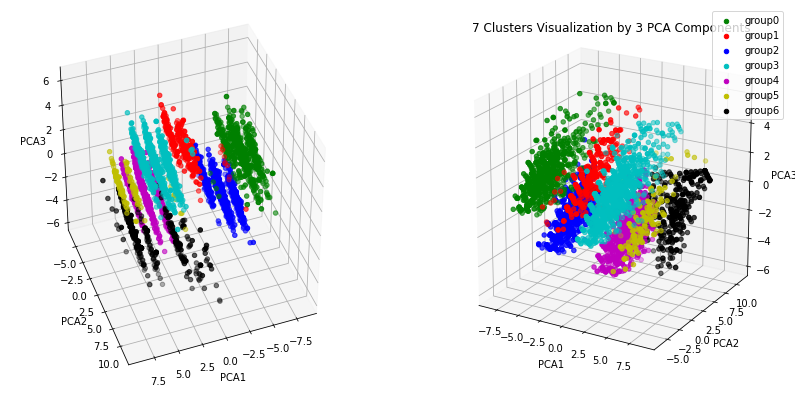

In [425]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components = 3)
pca3_transformed = pca3.fit_transform(df)

df['x'] = pca3_transformed[:, 0]
df['y'] = pca3_transformed[:, 1]
df['z'] = pca3_transformed[:, 2]

group0 = df[df['cluster'] == 0].index
group1 = df[df['cluster'] == 1].index
group2 = df[df['cluster'] == 2].index
group3 = df[df['cluster'] == 3].index
group4 = df[df['cluster'] == 4].index
group5 = df[df['cluster'] == 5].index
group6 = df[df['cluster'] == 6].index

fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')

ax1.scatter(xs = df.loc[group0, 'x'], ys = df.loc[group0, 'y'], zs = df.loc[group0, 'z'], color = 'g')
ax1.scatter(xs = df.loc[group1, 'x'], ys = df.loc[group1, 'y'], zs = df.loc[group1, 'z'], color = 'r')
ax1.scatter(xs = df.loc[group2, 'x'], ys = df.loc[group2, 'y'], zs = df.loc[group2, 'z'], color = 'b')
ax1.scatter(xs = df.loc[group3, 'x'], ys = df.loc[group3, 'y'], zs = df.loc[group3, 'z'], color = 'c')
ax1.scatter(xs = df.loc[group4, 'x'], ys = df.loc[group4, 'y'], zs = df.loc[group4, 'z'], color = 'm')
ax1.scatter(xs = df.loc[group5, 'x'], ys = df.loc[group5, 'y'], zs = df.loc[group5, 'z'], color = 'y')
ax1.scatter(xs = df.loc[group6, 'x'], ys = df.loc[group6, 'y'], zs = df.loc[group6, 'z'], color = 'k')

ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')
ax1.view_init(40,70)

ax2 = fig.add_subplot(122, projection='3d')

ax2.scatter(xs = df.loc[group0, 'x'], ys = df.loc[group0, 'y'], zs = df.loc[group0, 'z'], color = 'g')
ax2.scatter(xs = df.loc[group1, 'x'], ys = df.loc[group1, 'y'], zs = df.loc[group1, 'z'], color = 'r')
ax2.scatter(xs = df.loc[group2, 'x'], ys = df.loc[group2, 'y'], zs = df.loc[group2, 'z'], color = 'b')
ax2.scatter(xs = df.loc[group3, 'x'], ys = df.loc[group3, 'y'], zs = df.loc[group3, 'z'], color = 'c')
ax2.scatter(xs = df.loc[group4, 'x'], ys = df.loc[group4, 'y'], zs = df.loc[group4, 'z'], color = 'm')
ax2.scatter(xs = df.loc[group5, 'x'], ys = df.loc[group5, 'y'], zs = df.loc[group5, 'z'], color = 'y')
ax2.scatter(xs = df.loc[group6, 'x'], ys = df.loc[group6, 'y'], zs = df.loc[group6, 'z'], color = 'k')

ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_zlabel('PCA3')
ax2.view_init(20,-60)

plt.title('7 Clusters Visualization by 3 PCA Components')
plt.legend(['group0', 'group1', 'group2', 'group3', 'group4', 'group5', 'group6'])
plt.show()

### 결과 분석

In [432]:
df = df.drop(columns = ['x', 'y', 'z'])
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period,cluster
0,3,3,3,3,3,0,1,0,1,0,2,0
1,3,4,4,3,3,0,1,0,1,0,2,0
2,1,5,5,2,1,0,1,0,1,0,2,0
3,4,3,4,4,4,0,1,0,1,0,2,0
4,4,4,4,3,4,0,1,0,1,0,2,0


각 Cluster에 해당하는 강의평 수 계산

In [400]:
df.groupby('cluster').count()

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period
cluster,,,,,,,,,,,
0,793,793,793,793,793,793,793,793,793,793,793
1,296,296,296,296,296,296,296,296,296,296,296
2,816,816,816,816,816,816,816,816,816,816,816
3,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056
4,751,751,751,751,751,751,751,751,751,751,751
5,152,152,152,152,152,152,152,152,152,152,152
6,352,352,352,352,352,352,352,352,352,352,352


각 Cluster의 center 추출

In [442]:
df.groupby('cluster').mean()

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period
cluster,,,,,,,,,,,
0,3.692308,3.667087,3.658260,3.283733,3.571248,0.000000,1.000000,0.000000,1.000000,0.000000,1.974779
1,4.087838,3.243243,3.250000,4.067568,3.405405,0.165541,0.371622,0.266892,0.195946,1.000000,5.290541
2,3.851716,3.829657,3.776961,3.464461,3.838235,0.988971,0.011029,1.000000,0.000000,0.049020,1.939951
3,3.896780,3.405303,3.249053,3.681818,3.571023,0.000000,1.000000,0.000000,1.000000,0.000000,5.848485
4,4.049268,3.743009,3.648469,3.776298,3.889481,1.000000,0.000000,1.000000,0.000000,0.000000,5.888149
5,4.302632,3.151316,3.217105,4.401316,3.703947,1.000000,0.690789,0.000000,0.309211,0.000000,6.388158
6,2.454545,2.198864,2.411932,3.181818,1.775568,0.923295,0.002841,1.000000,0.000000,0.008523,4.713068


In [441]:
# 이거 minmaxscaling 때문에 값 이상하게 나옴. 보완 필요.
centers = pd.DataFrame(model.cluster_centers_)
centers = round(centers, 6)
centers.columns = df.columns[:-1]
centers

,satisfy,ratings0,ratings1,ratings2,ratings3,mon,tue,wed,thu,fri,period
0,0.673077,0.666772,0.664565,0.570933,0.642812,-0.000000,1.000000,0.000000,1.000000,-0.000000,0.162463
1,0.771959,0.560811,0.562500,0.766892,0.601351,0.165541,0.371622,0.266892,0.195946,1.000000,0.715090
2,0.712929,0.707414,0.694240,0.616115,0.709559,0.988971,0.011029,1.000000,-0.000000,0.049020,0.156658
3,0.724195,0.601326,0.562263,0.670455,0.642756,-0.000000,1.000000,0.000000,1.000000,0.000000,0.808081
4,0.762317,0.685752,0.662117,0.694075,0.722370,1.000000,0.000000,1.000000,-0.000000,-0.000000,0.814692
5,0.825658,0.537829,0.554276,0.850329,0.675987,1.000000,0.690789,-0.000000,0.309211,0.000000,0.898026
6,0.363636,0.299716,0.352983,0.545455,0.193892,0.923295,0.002841,1.000000,-0.000000,0.008523,0.618845


### output csv 파일 만들기

In [446]:
%cd /content/drive/MyDrive/Colab Notebooks/Lecture-Clustering

/content/drive/MyDrive/Colab Notebooks/Lecture-Clustering


In [397]:
output = pd.DataFrame()
for i in file_list_py:
  data = pd.read_csv(path + i)
  output = pd.concat([output, data])

output = output.reset_index(drop = True)
output['cluster'] = df['cluster']
output = output.sort_values(by = 'cluster', ascending = True)
output = output.drop(columns = ['Unnamed: 0'])

output.to_csv('output.csv')

In [398]:
output

,year,type,subject,professor,day,satisfy,writer,ratings0,ratings1,ratings2,ratings3,helpful,comment,cluster
0,14-2,COSE242,데이터통신,김효곤,#화(2) 목(2),3,배가고픔니다,3,3,3,3,교수님도 좋으시고 강의도 좋습니다. 비록 전 듣지 않았지만 아마도 좋은 것 같습니다...,도움이 돼요 2,0
3077,19-2,COSE371,데이터베이스,정연돈,#화(2) 목(2),2,BeneBean,3,3,3,3,뭐랄까... 교수님의 특유한 시크함?이 있어서 학생마다 평이 달라지는 것 같습니다....,도움이 돼요 0,0
3078,19-2,COSE371,데이터베이스,정연돈,#화(2) 목(2),2,우당교양관,5,5,1,3,중간고사 범위 이전까지는 쉽습니다만 기말고사 범위는 진짜 난이도도 높고 중간고사처럼...,도움이 돼요 0,0
3079,19-2,COSE371,데이터베이스,정연돈,#화(2) 목(2),3,포코코,3,3,3,3,교수님 무섭지만 츤데레에요. 중간고사까진 할만합니다.,도움이 돼요 0,0
3080,19-2,COSE371,데이터베이스,정연돈,#화(2) 목(2),5,bestpart,5,4,4,3,과제는 어렵지 않으나 시험이 조금 어려웠어요! 암기할만한 것들은 암기해가고 공부량...,도움이 돼요 0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,19-2,COSE214,알고리즘(영강),박성빈,#월(6) 수(6),3,j_park2000,1,1,1,1,설명하는게 조금 알아듣기 힘들어요...,도움이 돼요 0,6
3414,19-2,COSE214,알고리즘(영강),박성빈,#월(6) 수(6),3,sczcas,3,3,1,3,분명히 난 시험 답을 다 알았고 다 썼는데 비쁠나옴..아마 출첵했나봄. 난 수업한번...,도움이 돼요 0,6
3412,19-2,COSE214,알고리즘(영강),박성빈,#월(6) 수(6),4,SeaweedAshes,1,1,5,2,출석은 미리 공지를 하신 날에만 하고\n난이도는 쉬웠으며 학습량은 강의 중에 질문이...,도움이 돼요 0,6
1520,18-1,COSE361,인공지능,육동석,#월(1) 수(1),1,무주상보시,4,5,1,1,생각보다 학점이 한 단계 낮게 나왔으며 \n\n시험문제는 엉망이고\n\n수업은 맥락...,도움이 돼요 0,6


In [449]:
!git add .
!git commit -m "Upload Cl"


On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.gitignore
	Clustering.ipynb

nothing added to commit but untracked files present (use "git add" to track)
